In [198]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [199]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [200]:
for_normalized_df = df.drop(['target'], axis=1)
for_normalized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [201]:
normalized_df = (for_normalized_df/for_normalized_df.mean()) / for_normalized_df.std()
normalized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.127592,3.14106,3.006038,0.062813,0.018254,18.903351,0.000000,0.043761,0.000000,1.905459,0.000000,0.000000,0.705955
1,0.074935,3.14106,2.004025,0.056315,0.019586,0.000000,3.601246,0.054556,0.000000,2.899612,0.000000,0.000000,1.411910
2,0.083036,0.00000,1.002013,0.056315,0.015982,0.000000,0.000000,0.050180,0.000000,1.159845,2.319352,0.000000,1.411910
3,0.113415,3.14106,1.002013,0.051983,0.018489,0.000000,3.601246,0.051930,0.000000,0.662768,2.319352,0.000000,1.411910
4,0.115441,0.00000,0.000000,0.051983,0.027734,0.000000,3.601246,0.047554,6.514777,0.497076,2.319352,0.000000,1.411910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.115441,0.00000,0.000000,0.060647,0.018881,0.000000,3.601246,0.035884,6.514777,0.165692,1.159676,0.000000,2.117865
299,0.091137,3.14106,3.006038,0.047651,0.020683,0.000000,3.601246,0.038510,0.000000,0.994153,1.159676,0.000000,2.117865
300,0.137719,3.14106,0.000000,0.062380,0.015121,18.903351,3.601246,0.041136,0.000000,2.816766,1.159676,2.681463,2.117865
301,0.115441,3.14106,0.000000,0.056315,0.010263,0.000000,3.601246,0.033550,6.514777,0.994153,1.159676,1.340732,2.117865


In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df, df['target'], test_size=0.33, random_state=40)

In [204]:
accuracies = {}

In [205]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc = logreg.score(X_test, y_test)*100
accuracies['LogisticRegression'] = acc

f'LogisticRegression accuracy = {acc}%'

'LogisticRegression accuracy = 88.0%'

In [206]:
from sklearn.neighbors import KNeighborsClassifier as KNClassifier

knn = KNClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

acc = knn.score(X_test, y_test)*100
accuracies['KNClassifier'] = acc

f'KNClassifier accuracy = {acc}%'

'KNClassifier accuracy = 84.0%'

In [207]:
from sklearn.svm import SVC

svm = SVC(random_state=5)
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)*100
accuracies['SVC'] = acc

f'SVC accuracy = {acc}%'

'SVC accuracy = 85.0%'

In [209]:
accuracies

{'LogisticRegression': 88.0, 'KNClassifier': 84.0, 'SVC': 85.0}

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


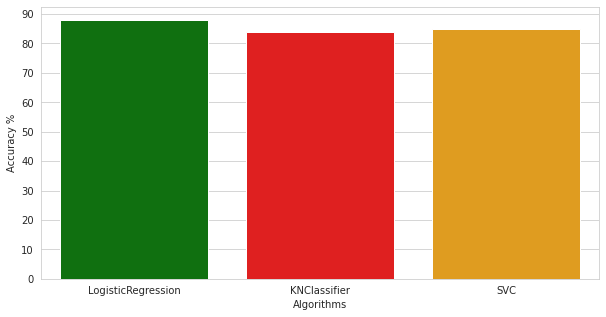

In [219]:
import seaborn as sns

colors = ['green', 'red', 'orange']

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()